## KUIS 1
### Nama    : Maulidio Farhan Rizkullah
### NIM     : 2141720041
### Kelas   : 3F
### Absen   : 19

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

f:\Program Files Software\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Nomor 1

Dataset ini tidak mengalami masalah data imbalance karena setiap kelas digit (0 hingga 9) memiliki jumlah sampel yang hampir sama.

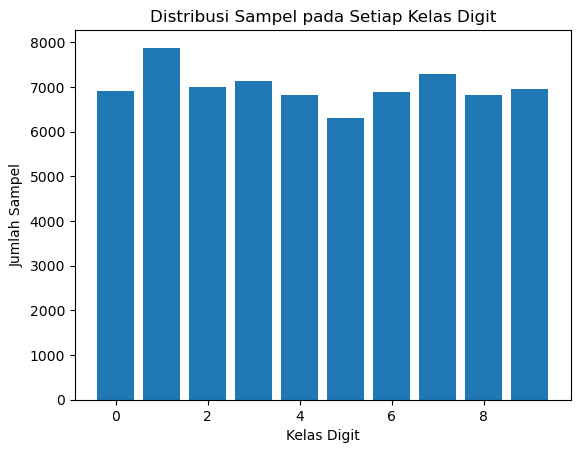

Jumlah sampel kelas 0: 6903
Jumlah sampel kelas 1: 7877
Jumlah sampel kelas 2: 6990
Jumlah sampel kelas 3: 7141
Jumlah sampel kelas 4: 6824
Jumlah sampel kelas 5: 6313
Jumlah sampel kelas 6: 6876
Jumlah sampel kelas 7: 7293
Jumlah sampel kelas 8: 6825
Jumlah sampel kelas 9: 6958


In [5]:
# Memisahkan data gambar dan label kelas
pixel_values, targets = mnist.data, mnist.target.astype(int)

# Menghitung jumlah sampel untuk setiap kelas digit
class_counts = {i: (targets == i).sum() for i in range(10)}

# Menampilkan grafik histogram jumlah sampel per kelas
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Kelas Digit")
plt.ylabel("Jumlah Sampel")
plt.title("Distribusi Sampel pada Setiap Kelas Digit")
plt.show()

# Menampilkan hasil
for digit, count in class_counts.items():
    print(f"Jumlah sampel kelas {digit}: {count}")


Dapat dilihat bahwa semua kelas memiliki jumlah sampel yang tidak jauh berbeda, masih dalam range yang hampir sama. Maka dapat disimpulkan bahwa dataset tidak terdapat data imbalance.

### Nomor 2


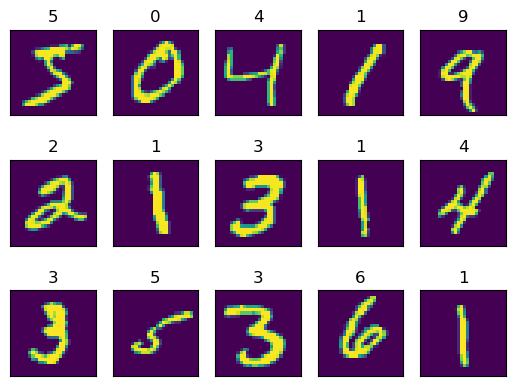

In [6]:
# Mengambil 15 baris pertama dari pixel_values dan targets, kemudian mengonversi mereka menjadi array NumPy
pixel_values_np = pixel_values[:15].to_numpy()
targets_np = targets[:15].to_numpy()

# Mengubah bentuk pixel_values_np menjadi bentuk (15, 28, 28)
pixel_values_reshaped = pixel_values_np.reshape(15, 28, 28)

for i, (img, y) in enumerate(zip(pixel_values_reshaped, targets_np)):
    plt.subplot(3,5,1 + i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(y)

    

### Nomor 3

In [7]:
mnist.data.shape

(70000, 784)

In [8]:
#load data
X = mnist.data.values.astype("float32")
y = mnist.target.values.astype("int64")

In [9]:
# Normalisasi data
X /= 255.0

In [10]:
X.min(), X.max()


(0.0, 1.0)

In [11]:
np.set_printoptions(linewidth=200)
print(np.array(X[0]))

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

Dimensi Data Gambar setelah PCA: (70000, 154)


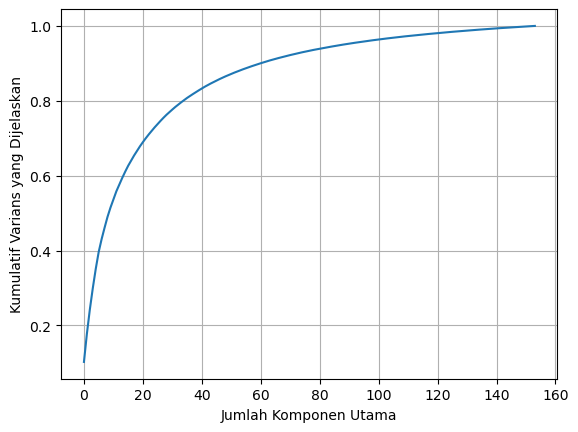

In [12]:
from sklearn import decomposition

pca = decomposition.PCA()

# Menggunakan PCA untuk mengurangi dimensi fitur
pca.n_components = .95
X_pca = pca.fit_transform(X)

# Dimensi data setelah PCA
print("Dimensi Data Gambar setelah PCA:", X_pca.shape)

# Menampilkan Tabel
# Menghitung nilai eigen setelah transformasi PCA
covariance_matrix = np.cov(X_pca, rowvar=False)
eigenvalues = np.linalg.eigvals(covariance_matrix)

# Mengurutkan eigenvalues dalam urutan menurun
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Menghitung kumulatif varians
cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

plt.plot(cumulative_variance)
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.grid()
plt.show()


In [13]:
np.set_printoptions(linewidth=200)
print(np.array(X_pca[0]))

[ 4.79444176e-01 -1.24013913e+00 -2.00406611e-01 -2.18395424e+00 -1.93098158e-01 -8.51154029e-01  9.16528046e-01  7.40527868e-01 -1.40704095e+00  7.98228562e-01  8.23708177e-01 -9.57996070e-01
 -2.25096524e-01  2.99506903e+00 -7.25908041e-01 -2.60932036e-02  1.38500130e+00  1.15387213e+00  1.07598817e+00  5.86957276e-01  7.70995691e-02 -2.99369633e-01 -7.90369928e-01  1.02247643e+00
  1.36219710e-01  3.52712154e-01 -1.13774431e+00  7.13717520e-01 -5.44526458e-01 -4.75676298e-01 -3.83887291e-01  1.60113528e-01  4.76268023e-01  3.89014691e-01 -5.65798640e-01  7.57807076e-01
  2.07992375e-01  8.11918378e-01  6.19473159e-01 -1.51210463e+00  5.14617622e-01  5.16371906e-01 -1.36481464e-01 -3.15497249e-01 -4.74686861e-01 -3.61728221e-02  4.41073537e-01 -3.39447618e-01
  1.22955792e-01  1.83478087e-01  3.93536538e-01 -5.40344357e-01 -4.93576765e-01  3.43234450e-01  3.11197378e-02 -7.60734677e-01 -2.16555402e-01 -2.90218413e-01 -5.10463357e-01 -5.00718415e-01
  2.19081059e-01 -3.11635956e-02 -4

### Nomor 4

In [14]:
from sklearn.model_selection import train_test_split

# Rasio 70:30
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=100)

# Rasio 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=100)

# Rasio 90:10
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, y, test_size=0.1, random_state=100)

print("Rasio 70:30")
print("Data Training:", X_train.shape, y_train.shape)
print("Data Testing:", X_test.shape, y_test.shape)
print('\n')
print("Rasio 80:20")
print("Data Training:", X_train2.shape, y_train2.shape)
print("Data Testing:", X_test2.shape, y_test2.shape)
print('\n')
print("Rasio 90:10")
print("Data Training:", X_train3.shape, y_train3.shape)
print("Data Testing:", X_test3.shape, y_test3.shape)



Rasio 70:30
Data Training: (49000, 154) (49000,)
Data Testing: (21000, 154) (21000,)


Rasio 80:20
Data Training: (56000, 154) (56000,)
Data Testing: (14000, 154) (14000,)


Rasio 90:10
Data Training: (63000, 154) (63000,)
Data Testing: (7000, 154) (7000,)


### Nomor 5

In [15]:
# Klasifikasi dengan SVM
from sklearn.svm import SVC

# Rasio 70:30
clf = SVC(gamma=0.001, C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Rasio 80:20
clf2 = SVC(gamma=0.001, C=1)
clf2.fit(X_train2, y_train2)
y_pred2 = clf2.predict(X_test2)

# Rasio 90:10
clf3 = SVC(gamma=0.001, C=1)
clf3.fit(X_train3, y_train3)
y_pred3 = clf3.predict(X_test3)


In [16]:
# Klasifikasi dengan Naive Bayes menggunakan Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Rasio 70:30
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predicted = gnb.predict(X_test)

# Rasio 80:20
gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)
y_predicted2 = gnb2.predict(X_test2)

# Rasio 90:10
gnb3 = GaussianNB()
gnb3.fit(X_train3, y_train3)
y_predicted3 = gnb3.predict(X_test3)


### Nomor 6

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def Evaluate(y_test, y_pred, label):
    acc = accuracy_score(y_test, y_pred)
    print("\n")
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print("\n")


In [18]:
# Evaluasi model SVM dengan rasio 70:30
Evaluate(y_test, y_pred, "SVM Rasio 70:30")




SVM Rasio 70:30 Accuracy: 0.9355714285714286 = 93.56%
SVM Rasio 70:30 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2035
           1       0.95      0.98      0.97      2379
           2       0.94      0.92      0.93      2104
           3       0.94      0.91      0.92      2193
           4       0.92      0.95      0.93      2104
           5       0.90      0.90      0.90      1860
           6       0.94      0.96      0.95      2094
           7       0.95      0.94      0.94      2155
           8       0.92      0.91      0.91      2004
           9       0.93      0.90      0.91      2072

    accuracy                           0.94     21000
   macro avg       0.93      0.93      0.93     21000
weighted avg       0.94      0.94      0.94     21000

SVM Rasio 70:30 Confusion Matrix:
[[1985    0    6    6    2   13    9    2   11    1]
 [   0 2343   10    7    1    4    3    3    6    2]
 [   9

In [19]:
# Evaluasi model SVM dengan rasio 80:20
Evaluate(y_test2, y_pred2, "SVM Rasio 80:20")



SVM Rasio 80:20 Accuracy: 0.938 = 93.80%
SVM Rasio 80:20 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.96      0.99      0.97      1587
           2       0.95      0.92      0.94      1420
           3       0.94      0.92      0.93      1492
           4       0.91      0.94      0.93      1390
           5       0.90      0.90      0.90      1239
           6       0.95      0.96      0.95      1373
           7       0.95      0.95      0.95      1412
           8       0.93      0.91      0.92      1323
           9       0.93      0.89      0.91      1408

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000

SVM Rasio 80:20 Confusion Matrix:
[[1332    0    3    3    0    9    5    0    4    0]
 [   0 1567    5    4    1    1    3    2    4    0]
 [   8    3 1309   

In [20]:
# Evaluasi model SVM dengan rasio 90:10
Evaluate(y_test3, y_pred3, "SVM Rasio 90:10")



SVM Rasio 90:10 Accuracy: 0.9424285714285714 = 94.24%
SVM Rasio 90:10 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       701
           1       0.96      0.98      0.97       792
           2       0.95      0.93      0.94       713
           3       0.93      0.92      0.92       715
           4       0.92      0.94      0.93       698
           5       0.91      0.91      0.91       630
           6       0.96      0.95      0.96       690
           7       0.96      0.94      0.95       724
           8       0.93      0.93      0.93       639
           9       0.94      0.92      0.93       698

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000

SVM Rasio 90:10 Confusion Matrix:
[[690   0   2   1   0   2   2   0   4   0]
 [  0 780   3   4   1   0   0   2   2   0]
 [  1   2 665   4   8   1 

In [21]:
# Evaluasi model Gaussian Naive Bayes dengan rasio 70:30
Evaluate(y_test, y_predicted, "Naive Bayes Rasio 70:30")



Naive Bayes Rasio 70:30 Accuracy: 0.8580476190476191 = 85.80%
Naive Bayes Rasio 70:30 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2035
           1       0.98      0.95      0.96      2379
           2       0.68      0.85      0.76      2104
           3       0.83      0.83      0.83      2193
           4       0.88      0.82      0.85      2104
           5       0.80      0.82      0.81      1860
           6       0.94      0.88      0.91      2094
           7       0.92      0.84      0.88      2155
           8       0.84      0.85      0.85      2004
           9       0.81      0.81      0.81      2072

    accuracy                           0.86     21000
   macro avg       0.86      0.86      0.86     21000
weighted avg       0.86      0.86      0.86     21000

Naive Bayes Rasio 70:30 Confusion Matrix:
[[1862    0   86   11    4   42   18    1   10    1]
 [   0 2256   16   16   14   16   1

In [22]:
# Evaluasi model Gaussian Naive Bayes dengan rasio 80:20
Evaluate(y_test2, y_predicted2, "Naive Bayes Rasio 80:20")



Naive Bayes Rasio 80:20 Accuracy: 0.8607857142857143 = 86.08%
Naive Bayes Rasio 80:20 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1356
           1       0.98      0.95      0.96      1587
           2       0.68      0.85      0.76      1420
           3       0.83      0.83      0.83      1492
           4       0.89      0.82      0.85      1390
           5       0.81      0.81      0.81      1239
           6       0.93      0.89      0.91      1373
           7       0.91      0.86      0.88      1412
           8       0.85      0.85      0.85      1323
           9       0.82      0.82      0.82      1408

    accuracy                           0.86     14000
   macro avg       0.87      0.86      0.86     14000
weighted avg       0.87      0.86      0.86     14000

Naive Bayes Rasio 80:20 Confusion Matrix:
[[1252    0   55    5    1   26   10    1    6    0]
 [   0 1502   11    8    9   11   1

In [23]:
# Evaluasi model Gaussian Naive Bayes dengan rasio 90:10
Evaluate(y_test3, y_predicted3, "Naive Bayes Rasio 90:10")



Naive Bayes Rasio 90:10 Accuracy: 0.8637142857142858 = 86.37%
Naive Bayes Rasio 90:10 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       701
           1       0.98      0.94      0.96       792
           2       0.70      0.87      0.77       713
           3       0.82      0.84      0.83       715
           4       0.89      0.82      0.85       698
           5       0.81      0.80      0.81       630
           6       0.94      0.88      0.91       690
           7       0.91      0.85      0.88       724
           8       0.84      0.85      0.85       639
           9       0.82      0.83      0.83       698

    accuracy                           0.86      7000
   macro avg       0.87      0.86      0.86      7000
weighted avg       0.87      0.86      0.87      7000

Naive Bayes Rasio 90:10 Confusion Matrix:
[[657   0  23   2   0  13   3   0   3   0]
 [  0 747   7   4   5   8   4   7  10   0]
 [

### Nomor 7

In [24]:
def Label_Predict(xtest, ytest, ypred):
    X_restored = pca.inverse_transform(xtest)
    plt.figure(figsize=(10, 7))
    plt.subplots_adjust(wspace=0.5, hspace=1)
    for i, (img, y) in enumerate(zip(X_restored[:25].reshape(25, 28, 28), ytest[:25])):
        
        if ytest[i] == ypred[i]:
            text_color = 'black'
        else:
            text_color = 'red'
        
        plt.subplot(5, 5, 1 + i)
        plt.imshow(img)
        plt.ylabel(f"Predict: {ytest[i]}", color = text_color)
        plt.title(f"{ypred[i]}")
        plt.xticks([])
        plt.yticks([])


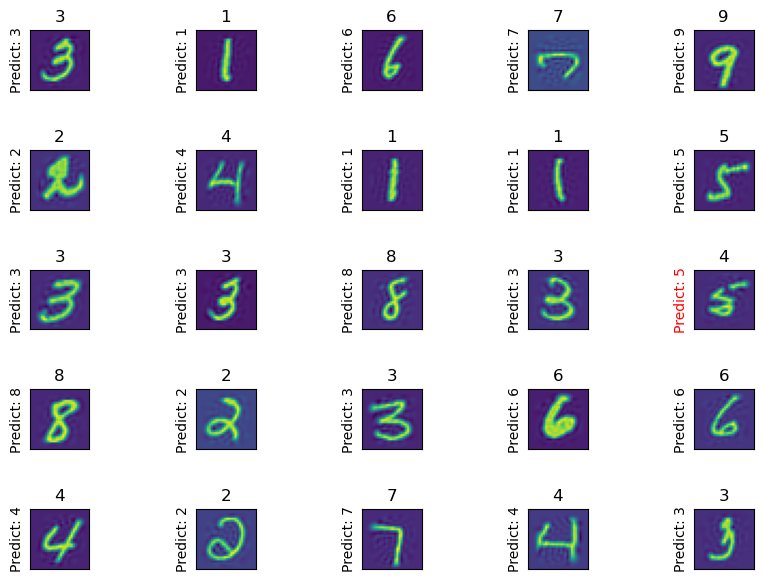

In [25]:
# Label SVM rasio 70:30
Label_Predict(X_test, y_test, y_pred)


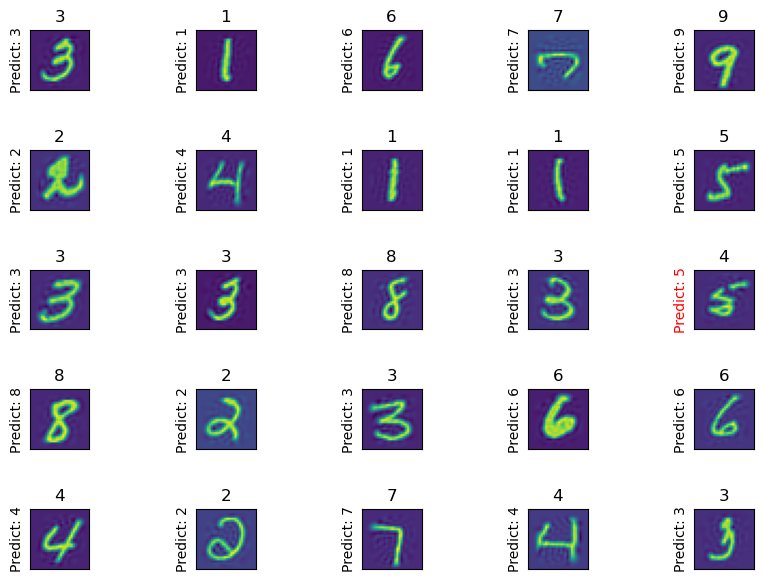

In [26]:
# Label SVM rasio 80:20
Label_Predict(X_test2, y_test2, y_pred2)

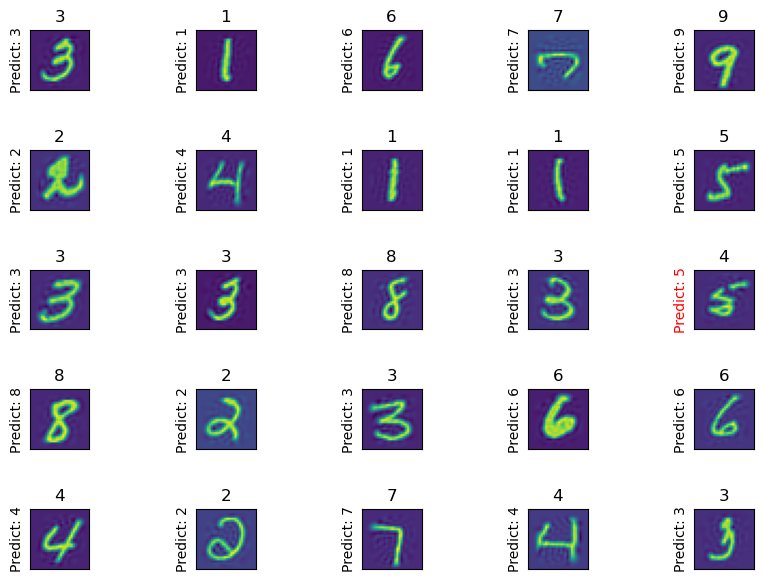

In [27]:
# Label SVM rasio 90:10
Label_Predict(X_test3, y_test3, y_pred3)

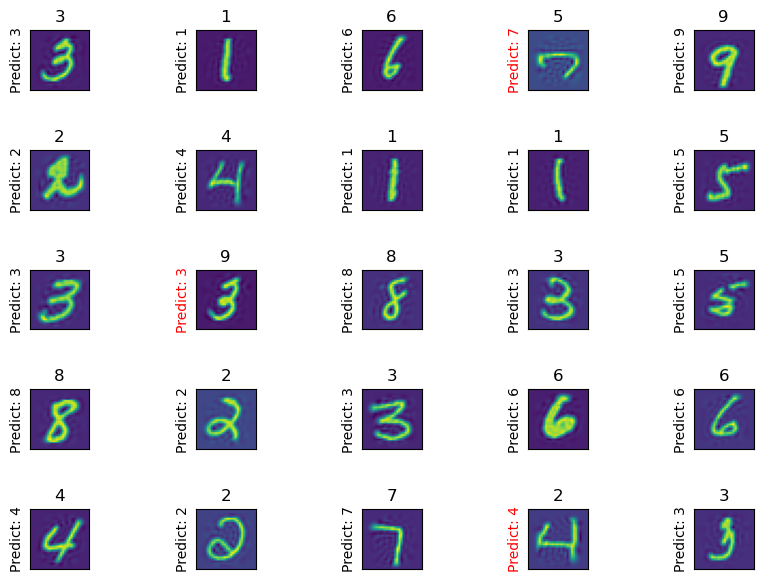

In [28]:
# Label Naive Bayes rasio 70:30
Label_Predict(X_test, y_test, y_predicted)

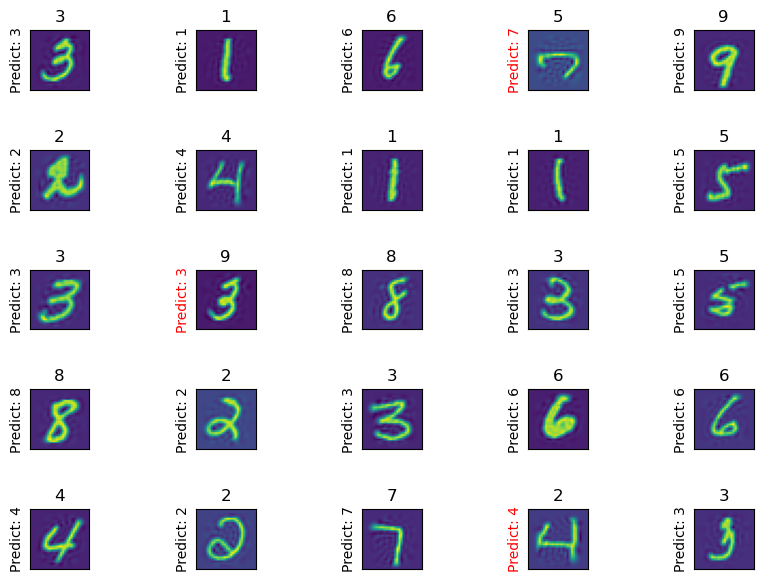

In [29]:
# Label Naive Bayes rasio 80:20
Label_Predict(X_test2, y_test2, y_predicted2)

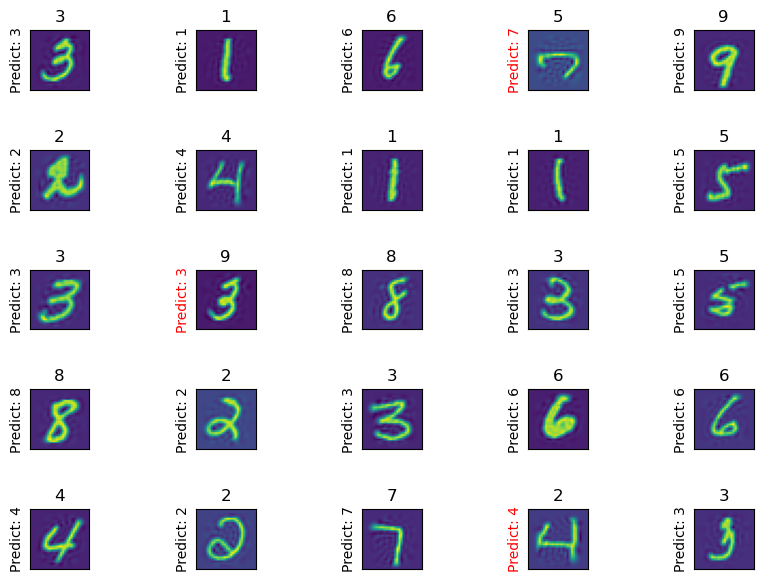

In [30]:
# Label Naive Bayes rasio 90:10
Label_Predict(X_test3, y_test3, y_predicted3)


### Nomor 8

In [32]:
acc = accuracy_score(y_test, y_pred)
acc2 = accuracy_score(y_test2, y_pred2)
acc3 = accuracy_score(y_test3, y_pred3)
acc4 = accuracy_score(y_test, y_predicted)
acc5 = accuracy_score(y_test2, y_predicted2)
acc6 = accuracy_score(y_test3, y_predicted3)
print("\n")
print(f"SVM Rasio 70:30 Accuracy: {acc} = {acc * 100:.2f}%")
print(f"SVM Rasio 80:20 Accuracy: {acc2} = {acc2 * 100:.2f}%")
print(f"SVM Rasio 90:10 Accuracy: {acc3} = {acc3 * 100:.2f}%")
print(f"MNB Rasio 70:30 Accuracy: {acc4} = {acc4 * 100:.2f}%")
print(f"MNB Rasio 80:20 Accuracy: {acc5} = {acc5 * 100:.2f}%")
print(f"MNB Rasio 90:10 Accuracy: {acc6} = {acc6 * 100:.2f}%")



SVM Rasio 70:30 Accuracy: 0.9355714285714286 = 93.56%
SVM Rasio 80:20 Accuracy: 0.938 = 93.80%
SVM Rasio 90:10 Accuracy: 0.9424285714285714 = 94.24%
MNB Rasio 70:30 Accuracy: 0.8580476190476191 = 85.80%
MNB Rasio 80:20 Accuracy: 0.8607857142857143 = 86.08%
MNB Rasio 90:10 Accuracy: 0.8637142857142858 = 86.37%


Setelah melakukan klasifikasi data dengan SVM dan Naive Bayes. Model terbaik yang saya dapatkan adalah model SVM yang menggunakan rasio 90:10 dengan tingkat akurasi 94.24%. Hasil tersebut dapat dilihat pada hasil diatas, dimana model SVM secara keseluruhan memiliki tingkat akurasi yang lebih baik dibandingkan Naive Bayes.